# Lab 2 : Implement and demonstrate Multiple Linear Regression for Brain Weights Prediction using sklearn Read the training data from a HeadBrain.CSV file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# load the dataset
df = pd.read_csv('/kaggle/input/headbrain/headbrain.csv')

In [2]:
df.shape

(237, 4)

In [3]:
df.head()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
0,1,1,4512,1530
1,1,1,3738,1297
2,1,1,4261,1335
3,1,1,3777,1282
4,1,1,4177,1590


In [4]:
df.isnull().sum()

Gender                 0
Age Range              0
Head Size(cm^3)        0
Brain Weight(grams)    0
dtype: int64

In [5]:
df.describe()

,Gender,Age Range,Head Size(cm^3),Brain Weight(grams)
count,237.000000,237.000000,237.000000,237.000000
mean,1.434599,1.535865,3633.991561,1282.873418
std,0.496753,0.499768,365.261422,120.340446
min,1.000000,1.000000,2720.000000,955.000000
25%,1.000000,1.000000,3389.000000,1207.000000
50%,1.000000,2.000000,3614.000000,1280.000000
75%,2.000000,2.000000,3876.000000,1350.000000
max,2.000000,2.000000,4747.000000,1635.000000


In [6]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

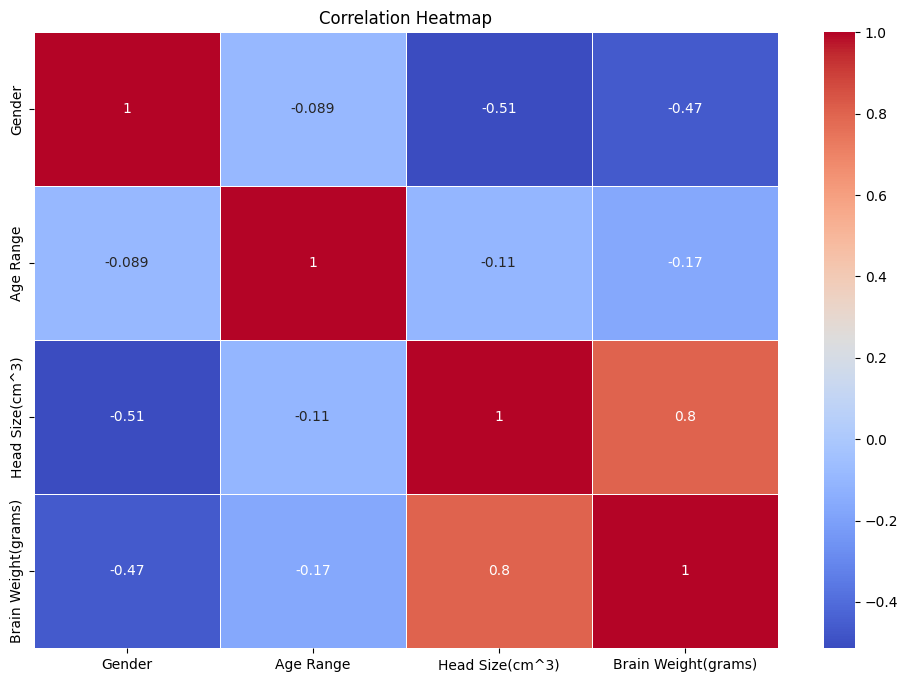

In [7]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm",
linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

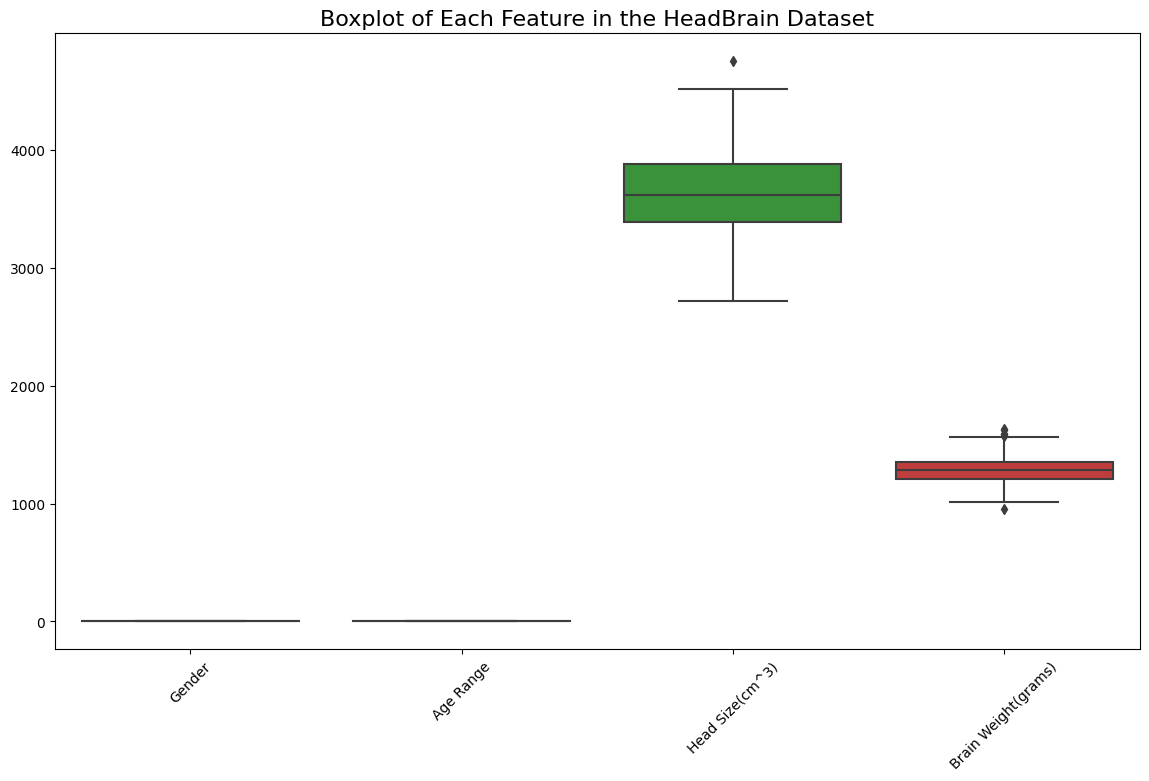

In [8]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df)
plt.title('Boxplot of Each Feature in the HeadBrain Dataset', fontsize=16)
plt.xticks(rotation=45)
plt.show()

Features with highest positive correlation:
 Brain Weight(grams)    1.000000
Head Size(cm^3)        0.799570
Age Range             -0.169438
Name: Brain Weight(grams), dtype: float64
Features with highest negative correlation:
 Head Size(cm^3)    0.799570
Age Range         -0.169438
Gender            -0.465266
Name: Brain Weight(grams), dtype: float64
Coefficients: [ -7.18012209 -11.79928219  87.6224021 ]
Intercept: 1281.3227513227514
Mean Absolute Error (MAE): 54.08968544229677
Mean Squared Error (MSE): 4349.999457297087
Root Mean Squared Error (RMSE): 65.9545256771443


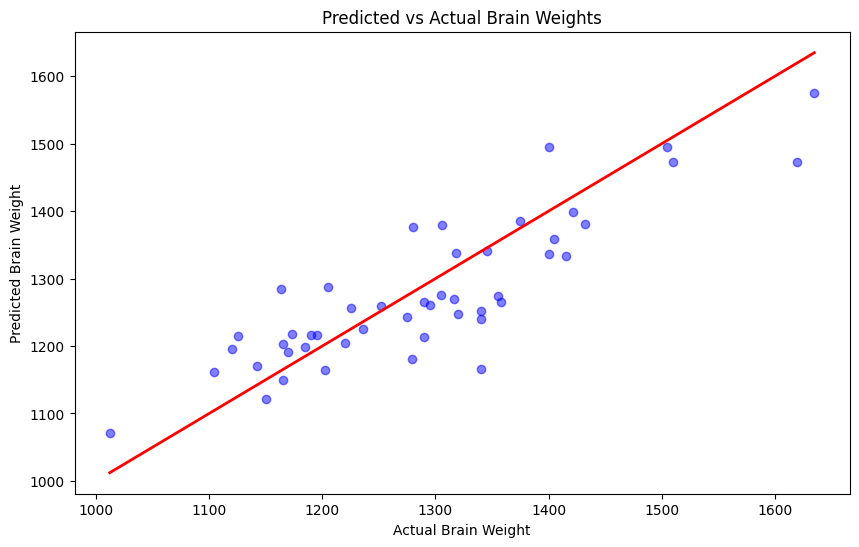

In [9]:
# Find the highest positive and negative correlations with the target variable (Brain Weight)
correlation_brain_weight = correlation_matrix['Brain Weight(grams)'].sort_values(ascending=False)
print("Features with highest positive correlation:\n",
correlation_brain_weight.head(3))
print("Features with highest negative correlation:\n",
correlation_brain_weight.tail(3))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Select the features (X) and the target variable (y)
X = df.drop('Brain Weight(grams)', axis=1)
y = df['Brain Weight(grams)']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
test_size=0.2, random_state=42)
# Standardize the feature variables
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
from sklearn.linear_model import LinearRegression
# Instantiate and train the model
model = LinearRegression()
model.fit(X_train, y_train)
# Display the model's coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
                                              
# Predict brain weights using the testing data
y_pred = model.predict(X_test)
# Calculate performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
# Plot predicted vs actual brain weights
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
color='red', linewidth=2)
plt.title('Predicted vs Actual Brain Weights')
plt.xlabel('Actual Brain Weight')
plt.ylabel('Predicted Brain Weight')
plt.show()